In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from random import random
import time
import scipy
import scipy.sparse.linalg

# modify to where you store your project data including utils.py
# datadir = "/content/drive/My Drive/cs445_projects/proj3/" 
datadir = "./" 

utilfn = datadir + "utils.py"

samplesfn = datadir + "samples"
# !cp -r "$samplesfn" .
import utils

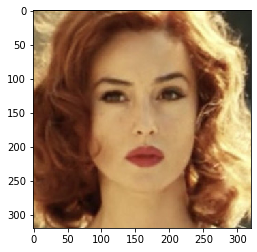

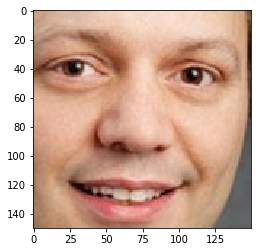

In [2]:
background_img = cv2.cvtColor(cv2.imread('samples/woman.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)
plt.show()
object_img = cv2.cvtColor(cv2.imread('samples/man.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
object_img = object_img[100:250, 100:250, :]
plt.imshow(object_img)
plt.show()

In [3]:
def eye_detection(img):
    image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    image_gray = cv2.equalizeHist(image_gray)
    #-- Detect faces
    face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')
    faces = face_cascade.detectMultiScale(image_gray, 1.03, 3)
    plt.imshow(img)
    for (x,y,w,h) in faces:
        center = (x + w//2, y + h//2)
        img = cv2.ellipse(img, center, (w//2, h//2), 0, 0, 360, (255, 0, 255), 4)
        faceROI = image_gray[y:y+h,x:x+w]
        start = 5
        eyes = eye_cascade.detectMultiScale(faceROI, 1.03, 5)
        while eyes.shape[0] > 2:
            start +=5
            eyes = eye_cascade.detectMultiScale(faceROI, 1.03, start)
        print(eyes.shape)
        x1,y1,w1,h1 = eyes[0]
        x2,y2,w2,h2 = eyes[1]   
        eye1_center = (x + x1 + w1//2, y + y1 + h1//2)
        radius1 = int(round((w1 + h1)*0.25))
        img = cv2.circle(img, eye1_center, radius1, (255, 0, 0 ), 4)
        eye2_center = (x + x2 + w2//2, y + y2 + h2//2)
        radius2 = int(round((w2 + h2)*0.25))
        img = cv2.circle(img, eye2_center, radius2, (255, 0, 0 ), 4)
    plt.figure()
    result = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).astype('double') / 255.0 
    plt.imshow(result)
    #cv2.imshow('Capture - Face detection', img)
    eyes = np.array([[x + x1 + w1//2, y + y1 + h1//2], [x + x2 + w2//2, y + y2 + h2//2]])
    return eyes

(2, 4)


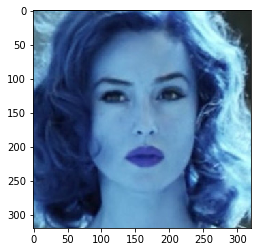

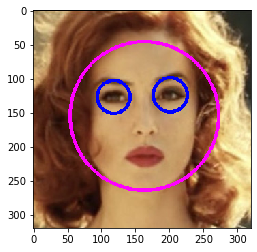

In [4]:
eye1_locations = eye_detection(cv2.imread('samples/woman.jpeg'))

(2, 4)


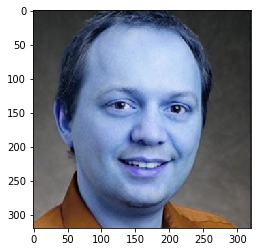

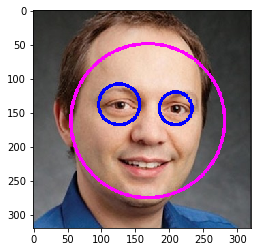

In [5]:
eye2_locations = eye_detection(cv2.imread('samples/man.jpeg'))

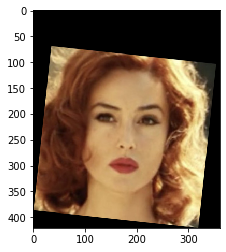

In [6]:
img1 = cv2.cvtColor(np.float32(cv2.imread('samples/woman.jpeg') / 255.0), cv2.COLOR_BGR2RGB) 
img2 = cv2.cvtColor(np.float32(cv2.imread('samples/man.jpeg') / 255.0), cv2.COLOR_BGR2RGB)
im1, im2 = utils.align_images(img1, img2, eye1_locations , eye2_locations,
                 save_images=False)

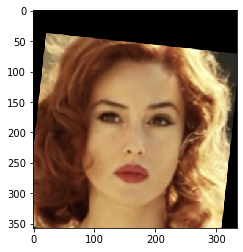

In [7]:
plt.imshow(im1)

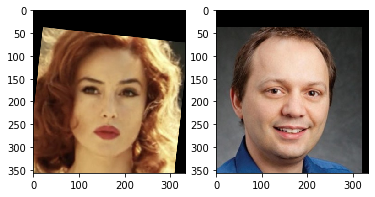

In [10]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[1].imshow(im2,cmap='gray')

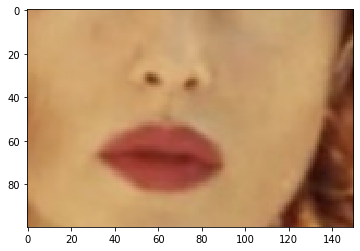

In [11]:
plt.imshow(im1[200:300, 100:250])

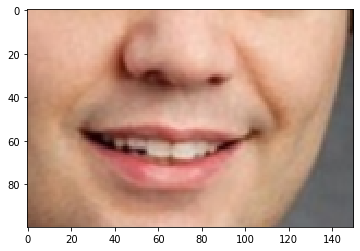

In [12]:
plt.imshow(im2[200:300, 100:250])

In [34]:
np.asarray(eye2_locations)

array([[209, 144],
       [126, 138]])

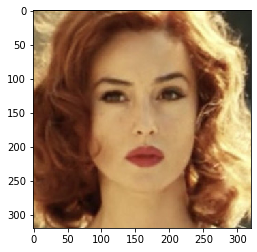

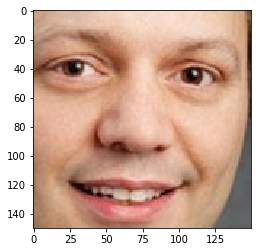

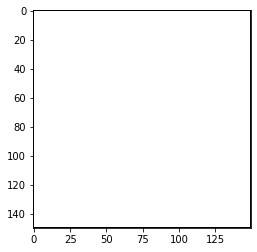

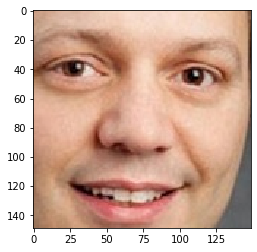

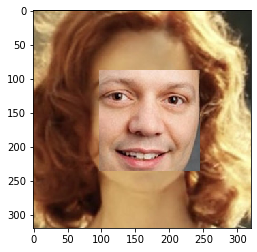

In [2]:
use_interface = False # set to true if you want to use the interface to choose points (might not work in Colab)
if not use_interface:
  xs = (1, 149, 149, 1)
  ys = (1, 1, 149, 149)
  object_mask = utils.get_mask(ys, xs, object_img)
  bottom_center = (170, 235) # (x,y)

  object_img, object_mask = utils.crop_object_img(object_img, object_mask)
  bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)
    
  plt.figure()
  plt.imshow(object_img)

  fig = plt.figure()
  plt.imshow(utils.get_combined_img(background_img, object_img, object_mask, bg_ul))


In [ ]:
im_blend = np.zeros(background_img.shape)
temp = 0
# object_mask[-1,:] *= 0
# object_mask[:,-1] *= 0
# object_mask[0,:]  *= 0
# object_mask[:,0]  *= 0
for b in np.arange(3):
    im_blend[:,:,b] = poisson_blend(object_img[:,:,b], object_mask, background_img[:,:,b].copy(), bg_ul)


plt.figure(figsize=(7,7))
plt.imshow(im_blend)

In [ ]:
background_img = cv2.cvtColor(cv2.imread('samples/man.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)
plt.show()
object_img = cv2.cvtColor(cv2.imread('samples/woman.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
object_img = object_img[90:240, 90:240, :]
plt.imshow(object_img)
plt.show()


use_interface = False # set to true if you want to use the interface to choose points (might not work in Colab)
if not use_interface:
  xs = (1, 149, 149, 1)
  ys = (1, 1, 149, 149)
  object_mask = utils.get_mask(ys, xs, object_img)
  bottom_center = (165, 255) # (x,y)

  object_img, object_mask = utils.crop_object_img(object_img, object_mask)
  bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)
    
  plt.figure()
  plt.imshow(object_img)

  fig = plt.figure()
  plt.imshow(utils.get_combined_img(background_img, object_img, object_mask, bg_ul))



In [ ]:
im_blend = np.zeros(background_img.shape)
temp = 0
object_mask[-1,:] *= 0
object_mask[:,-1] *= 0
object_mask[0,:]  *= 0
object_mask[:,0]  *= 0
for b in np.arange(3):
    im_blend[:,:,b] = poisson_blend(object_img[:,:,b], object_mask, background_img[:,:,b].copy(), bg_ul)


plt.figure(figsize=(7,7))
plt.imshow(im_blend)

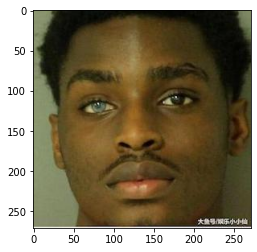

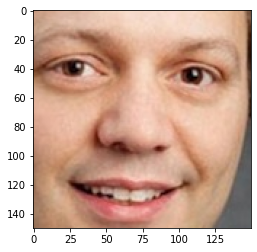

In [11]:
background_img = cv2.cvtColor(cv2.imread('samples/bm.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
plt.figure()
plt.imshow(background_img)
plt.show()
object_img = cv2.cvtColor(cv2.imread('samples/man.jpeg'), cv2.COLOR_BGR2RGB).astype('double') / 255.0 
object_img = object_img[100:250, 100:250, :]
plt.imshow(object_img)
plt.show()


use_interface = True # set to true if you want to use the interface to choose points (might not work in Colab)
if not use_interface:

  H,W,C = object_img.shape
  object_img = cv2.resize(object_img, (int(H*1.2), int(W*1.2)))
  H,W,C = object_img.shape
  xs = (1, H-2, H-2, 1)
  ys = (1, 1, W-2, W-2)
    
  object_mask = utils.get_mask(ys, xs, object_img)
  bottom_center = (143, 250) # (x,y)

  object_img, object_mask = utils.crop_object_img(object_img, object_mask)
  bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)
    
  plt.figure()
  plt.imshow(object_img)

  fig = plt.figure()
  plt.imshow(utils.get_combined_img(background_img, object_img, object_mask, bg_ul))



If it doesn't get you to the drawing mode, then rerun this function again.


<IPython.core.display.Javascript object>


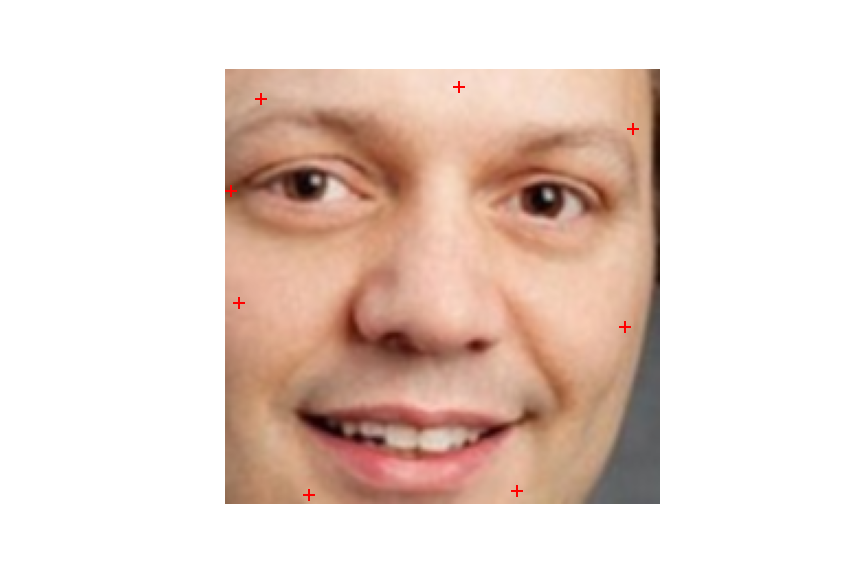

In [17]:

if use_interface:
  object_img = cv2.resize(object_img, (int(H*1.1), int(W*1.1)))
  import matplotlib.pyplot as plt
  %matplotlib notebook
  mask_coords = utils.specify_mask(object_img)

<Figure size 432x288 with 0 Axes>

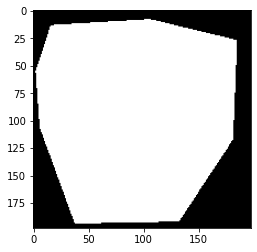

In [18]:
if use_interface:
  xs = mask_coords[0]
  ys = mask_coords[1]
  %matplotlib inline
  import matplotlib.pyplot as plt
  plt.figure()
  object_mask = utils.get_mask(ys, xs, object_img)

In [19]:
bottom_center = (143, 250) # (x,y)
bg_ul = utils.upper_left_background_rc(object_mask, bottom_center)

finish preprocess
poisson done
finish preprocess
poisson done
finish preprocess


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


poisson done


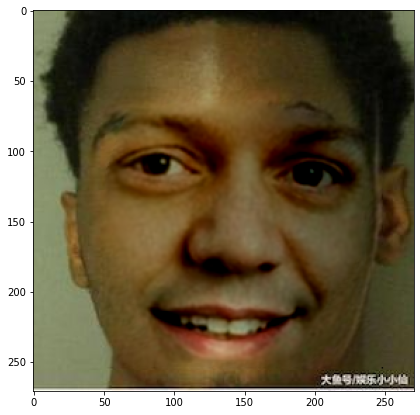

In [20]:
im_blend = np.zeros(background_img.shape)
temp = 0
object_mask[-1,:] *= 0
object_mask[:,-1] *= 0
object_mask[0,:]  *= 0
object_mask[:,0]  *= 0
for b in np.arange(3):
    im_blend[:,:,b] = utils.poisson_blend(object_img[:,:,b], object_mask, background_img[:,:,b].copy(), bg_ul)


plt.figure(figsize=(7,7))
plt.imshow(im_blend)